In [1]:
import keras
#Cargue del conjunto de datos Fashion MNIST
fmnist = keras.datasets.fashion_mnist

In [2]:
#Cargue la división de entrenamiento y prueba del conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images,
test_labels) = fmnist.load_data ()

4422102/4422102 [==============================] - 0s 0us/step


Label: 0
 Image:
 [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16 

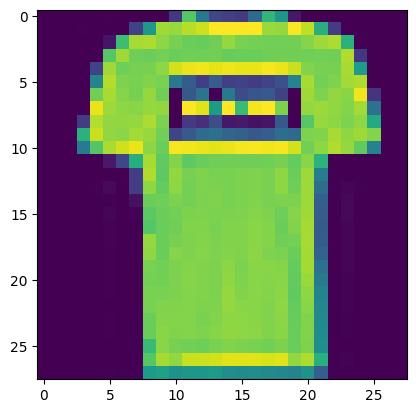

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#Puedes poner aquí entre 0 y 59999
index = 1

#Imprime la etiqueta y la imagen.
np. set_printoptions (linewidth=320)
print (f'Label: {training_labels[index]}')
print (f' Image:\n {training_images [index]}')

#Visualiza la imagen
plt.imshow (training_images [index])

In [4]:
#Normalizar los valores de pixeles del tren y probar las imágenes.
training_images = training_images / 255.0
test_images = test_images / 255.0

In [10]:
#Construir el modelo de clasificación.
model = keras.models.Sequential ([keras.layers.Flatten(input_shape=(28
, 28)),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10, activation='softmax')])

In [11]:
#Compilar el modelo
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model.summary()

#Entrenar el modelo
history = model.fit(training_images, training_labels,
epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4995 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3760 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss

<Axes: >

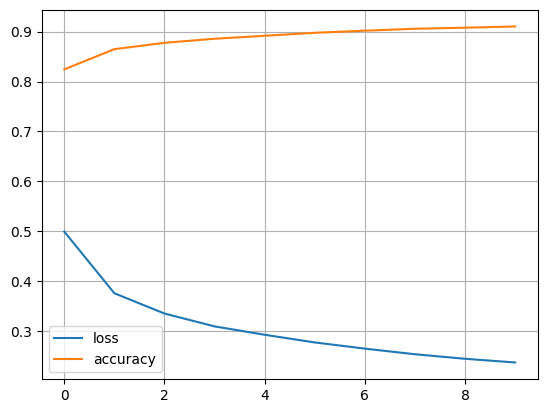

In [15]:
#Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)


In [16]:
#Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images,
training_labels)
print ("Pérdida en el conjunto de entrenamiento:", loss)
print ("Precisión en el conjunto de entrenamiento:", accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2106 - accuracy: 0.9212
Pérdida en el conjunto de entrenamiento: 0.21055079996585846
Precisión en el conjunto de entrenamiento: 0.9211666584014893


In [17]:
#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate (test_images, test_labels)
print ("Pérdida en el conjunto de prueba:", loss)
print ("precisión en el conjunto de prueba:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3306 - accuracy: 0.8851
Pérdida en el conjunto de prueba: 0.330607533454895
precisión en el conjunto de prueba: 0.8851000070571899


In [20]:
#predict
index=1
print(f'Label:{test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label:2
1/1 [==============================] - 0s 21ms/step
Classification:
 [[5.63110334e-05]
 [1.89918963e-13]
 [9.98871624e-01]
 [2.89264203e-11]
 [9.54165298e-04]
 [8.61145270e-12]
 [1.17920754e-04]
 [1.14161549e-19]
 [5.86089177e-10]
 [1.05130011e-12]]
